In [ ]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

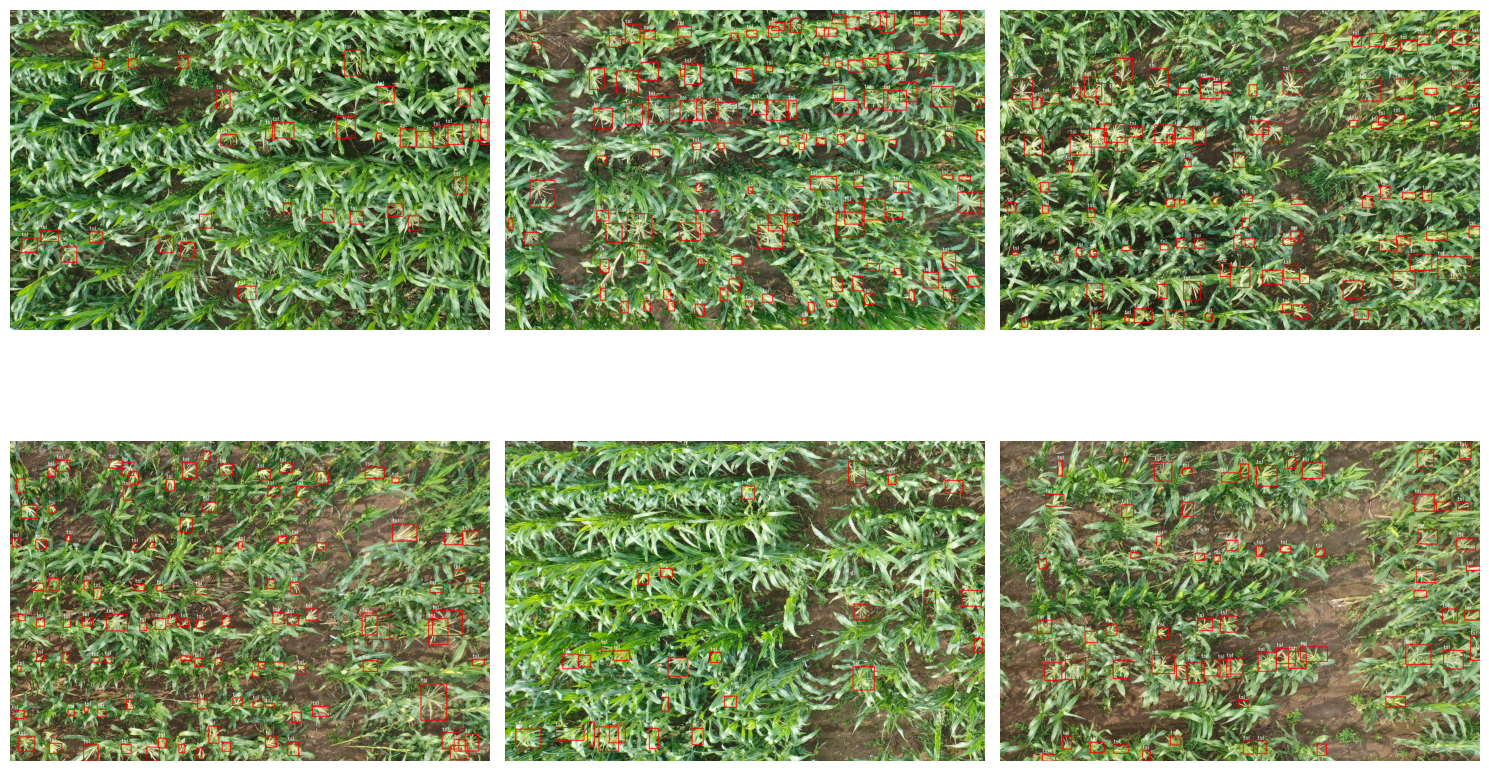

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='8_aggressive_geomtric',
            batch=32, device=device, seed=69,
            hsv_h=0.02,
            hsv_s=0.8,
            hsv_v=0.5,
            degrees=30,
            translate=0.2,
            scale=0.75,
            mixup=0.1,
            perspective=0.001,
            shear=10)

New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=8_aggressive_geomtric, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'



val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/8_aggressive_geomtric/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/8_aggressive_geomtric
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      14.2G      3.952      3.002      2.089        465        640: 100%|██████████| 16/16 [00:05<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all        124       7610     0.0608      0.179     0.0439     0.0139


2025-04-23 17:33:04,745 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      12.7G      2.681      1.767      1.292        995        640: 100%|██████████| 16/16 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all        124       7610     0.0942       0.46      0.202     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      12.6G      2.559      1.659      1.223        342        640: 100%|██████████| 16/16 [00:03<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all        124       7610      0.227      0.478      0.274     0.0875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      14.5G      2.482      1.576      1.198        877        640: 100%|██████████| 16/16 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all        124       7610      0.389      0.429       0.34     0.0942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      15.9G      2.411      1.533      1.183        590        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all        124       7610      0.346      0.393       0.28     0.0772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      14.9G      2.422      1.507      1.164        598        640: 100%|██████████| 16/16 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all        124       7610      0.528      0.523      0.481      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      17.7G      2.345       1.46      1.159        717        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all        124       7610      0.465      0.513      0.415      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      11.1G      2.315      1.418      1.159        565        640: 100%|██████████| 16/16 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.663       0.57      0.592      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      11.5G      2.282      1.414      1.155        355        640: 100%|██████████| 16/16 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all        124       7610      0.566      0.502      0.488      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      12.9G      2.294      1.395      1.135        819        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all        124       7610      0.608      0.534      0.537      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      14.8G      2.265      1.368       1.13        589        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]

                   all        124       7610      0.651      0.585      0.592      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      15.4G      2.252      1.354      1.136        642        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all        124       7610      0.625      0.584      0.585      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80        14G      2.195      1.353      1.135        548        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.649      0.577      0.594      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      13.1G      2.211      1.322      1.116        367        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.652        0.6      0.571      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      14.1G      2.253      1.323      1.114        554        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610      0.674      0.579      0.614      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      13.1G      2.179      1.297      1.108        602        640: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all        124       7610      0.616      0.592      0.556      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80        13G      2.241      1.283      1.115        779        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610       0.72      0.619      0.658      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      15.5G      2.179      1.307      1.107        432        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.633      0.596       0.56      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      11.7G      2.197      1.291      1.113        684        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all        124       7610      0.698      0.599      0.633      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80        13G      2.188      1.276      1.109        765        640: 100%|██████████| 16/16 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        124       7610      0.726       0.62      0.676      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      13.2G       2.18      1.323      1.114        200        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.695      0.589      0.634      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      17.2G      2.222      1.304      1.112        713        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all        124       7610      0.549      0.546       0.47      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      13.6G      2.197      1.282      1.107        680        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all        124       7610      0.717      0.622      0.656      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      17.6G      2.124      1.251      1.082        433        640: 100%|██████████| 16/16 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.707      0.624      0.652      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      13.2G      2.133      1.226      1.096        560        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.718      0.637      0.666      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      13.3G      2.144      1.243      1.096        571        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all        124       7610      0.663      0.614      0.594      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      12.1G      2.176      1.292      1.102        354        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all        124       7610      0.729      0.634      0.678      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      13.8G      2.137      1.263      1.096        399        640: 100%|██████████| 16/16 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.693      0.663      0.645      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      11.2G      2.121      1.229      1.094        314        640: 100%|██████████| 16/16 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.716      0.627      0.668      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      13.7G      2.116       1.23        1.1        387        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all        124       7610      0.741       0.65      0.698      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      12.3G      2.129      1.246      1.096        498        640: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.761      0.661      0.714      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      12.3G      2.109      1.225      1.075        656        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.707      0.648      0.666       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      12.9G      2.109      1.216      1.094        307        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610       0.69      0.628      0.648      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      13.3G      2.133      1.237      1.083        637        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.771      0.675      0.723      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      16.9G      2.108      1.217       1.09        653        640: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all        124       7610      0.762       0.66      0.715       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      16.1G      2.093      1.232      1.097        458        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        124       7610      0.765      0.674      0.719      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      12.4G      2.085      1.203       1.08        551        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all        124       7610      0.731      0.646      0.692      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      15.6G      2.098      1.213      1.092        779        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all        124       7610      0.766      0.657      0.718      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      16.3G      2.094      1.201      1.075        581        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        124       7610      0.695      0.637      0.664      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      13.7G      2.129      1.229      1.078        906        640: 100%|██████████| 16/16 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all        124       7610      0.757      0.678      0.712      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      15.4G      2.112      1.219      1.089        603        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.767      0.679      0.731       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      15.1G      2.065      1.173      1.088        703        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.776       0.69      0.743      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      15.8G      2.089      1.184      1.077        742        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.775      0.698      0.745      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      16.9G      2.071      1.194      1.074        548        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.795      0.686      0.751      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      15.8G      2.064      1.158      1.063        503        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.775      0.682      0.735      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      18.4G      2.058      1.162      1.075        325        640: 100%|██████████| 16/16 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.769      0.675      0.741      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      12.3G      2.089      1.192      1.071        405        640: 100%|██████████| 16/16 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610       0.75      0.671      0.725       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      12.7G      2.069      1.191      1.079        333        640: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all        124       7610      0.768      0.678      0.726      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      15.1G      2.075      1.168      1.072        671        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.764      0.661       0.73      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      15.1G      2.023       1.12      1.062        540        640: 100%|██████████| 16/16 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.721      0.607      0.677      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      13.5G      2.039      1.155      1.064        573        640: 100%|██████████| 16/16 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.779      0.687      0.738      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      12.3G      2.068      1.161      1.069        418        640: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.762      0.686      0.733      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      12.8G      2.022      1.145      1.058        539        640: 100%|██████████| 16/16 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all        124       7610      0.782      0.668      0.742      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      13.3G      2.048      1.146      1.055        689        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.771      0.681      0.741      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      15.7G      2.061      1.148      1.064        407        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.772      0.699      0.743      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      10.8G      2.042      1.148      1.065        439        640: 100%|██████████| 16/16 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.783      0.696      0.748      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      15.8G       2.05      1.143      1.073        711        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610       0.77      0.677      0.739      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      12.4G      2.047      1.152      1.066        472        640: 100%|██████████| 16/16 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all        124       7610      0.778      0.691      0.746      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      11.6G      2.044      1.161      1.072        267        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.793       0.69      0.752      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      13.4G      2.005      1.122      1.062        705        640: 100%|██████████| 16/16 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all        124       7610      0.796      0.698       0.76      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      13.7G      2.045      1.143       1.06        563        640: 100%|██████████| 16/16 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.759      0.694      0.741       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      17.4G      2.018      1.111      1.068        662        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.802      0.708       0.77      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      14.2G      2.004      1.107      1.069        304        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.762      0.667       0.73      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      15.4G      2.046      1.126      1.058        763        640: 100%|██████████| 16/16 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.789      0.703      0.752      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      17.3G       2.01      1.129      1.064        567        640: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        124       7610      0.778      0.687      0.753      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      11.8G      1.967      1.091      1.051        362        640: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.779      0.705      0.752      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      12.9G      2.007      1.115      1.067        634        640: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.786      0.716      0.765      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80        15G      2.008      1.114      1.059        449        640: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.796      0.711       0.77      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      12.1G       2.03      1.148      1.059        813        640: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.794      0.712      0.767      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      14.6G      2.044      1.154      1.067        682        640: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all        124       7610      0.788      0.705      0.762      0.322


Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      11.3G      1.917      1.156       1.08        263        640: 100%|██████████| 16/16 [00:05<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.787      0.698      0.755      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      9.17G      1.876      1.038      1.064        242        640: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610      0.808      0.711      0.771      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      9.72G      1.856      1.026      1.068        139        640: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all        124       7610      0.807      0.709      0.761      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80        10G      1.828      1.008      1.062        255        640: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all        124       7610        0.8      0.715      0.775      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      9.42G      1.864      1.021      1.048        238        640: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.794      0.712      0.767      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      10.1G      1.867      1.034      1.048        333        640: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.795       0.71      0.766      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      8.97G      1.835      1.027      1.061        135        640: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.795      0.709      0.764      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      9.87G      1.844     0.9933      1.053        361        640: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        124       7610      0.799      0.714      0.772      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      9.46G       1.83     0.9951       1.05        302        640: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all        124       7610      0.801      0.713      0.775      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      8.79G      1.825     0.9888      1.053        209        640: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610      0.796      0.712      0.772      0.333



80 epochs completed in 0.123 hours.
Optimizer stripped from YOLO11s/8_aggressive_geomtric/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/8_aggressive_geomtric/weights/best.pt, 19.2MB

Validating YOLO11s/8_aggressive_geomtric/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.88s/it]


                   all        124       7610        0.8      0.714      0.774      0.334
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to YOLO11s/8_aggressive_geomtric


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9ee576c250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

2025-04-23 17:40:39,286 - clearml.storage - INFO - Uploading: 18.27MB to YOLO11s/8_aggressive_geomtric/weights/best.pt


███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 13.67MB/s]: /home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.27/18.27 MB [00:01<00:00, 11.01MB/s]: 

2025-04-23 17:40:40,956 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/8_aggressive_geomtric.bbf116b9258042868181749536099d2d/models/best.pt


In [6]:
df = pd.read_csv('YOLO11s/8_aggressive_geomtric/results.csv')

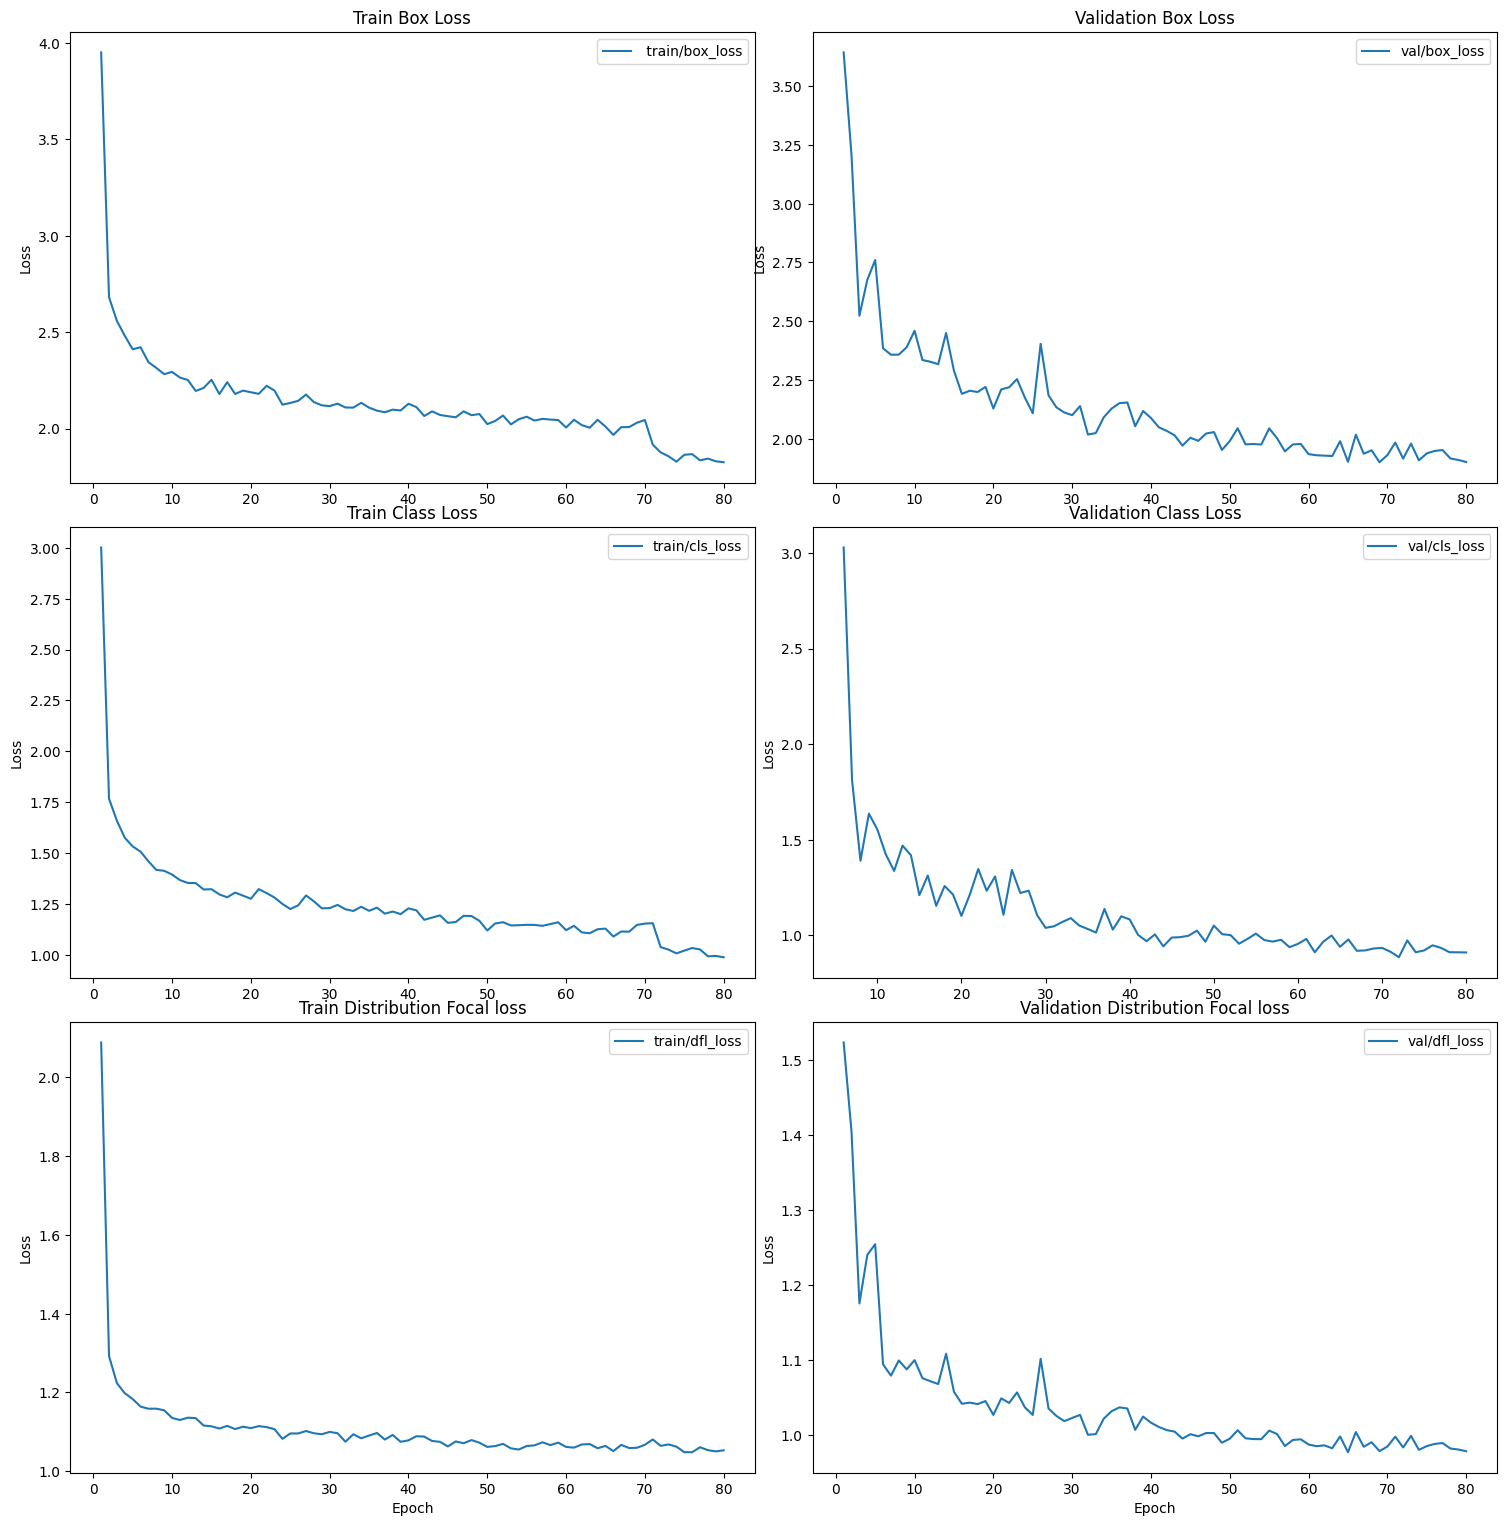

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

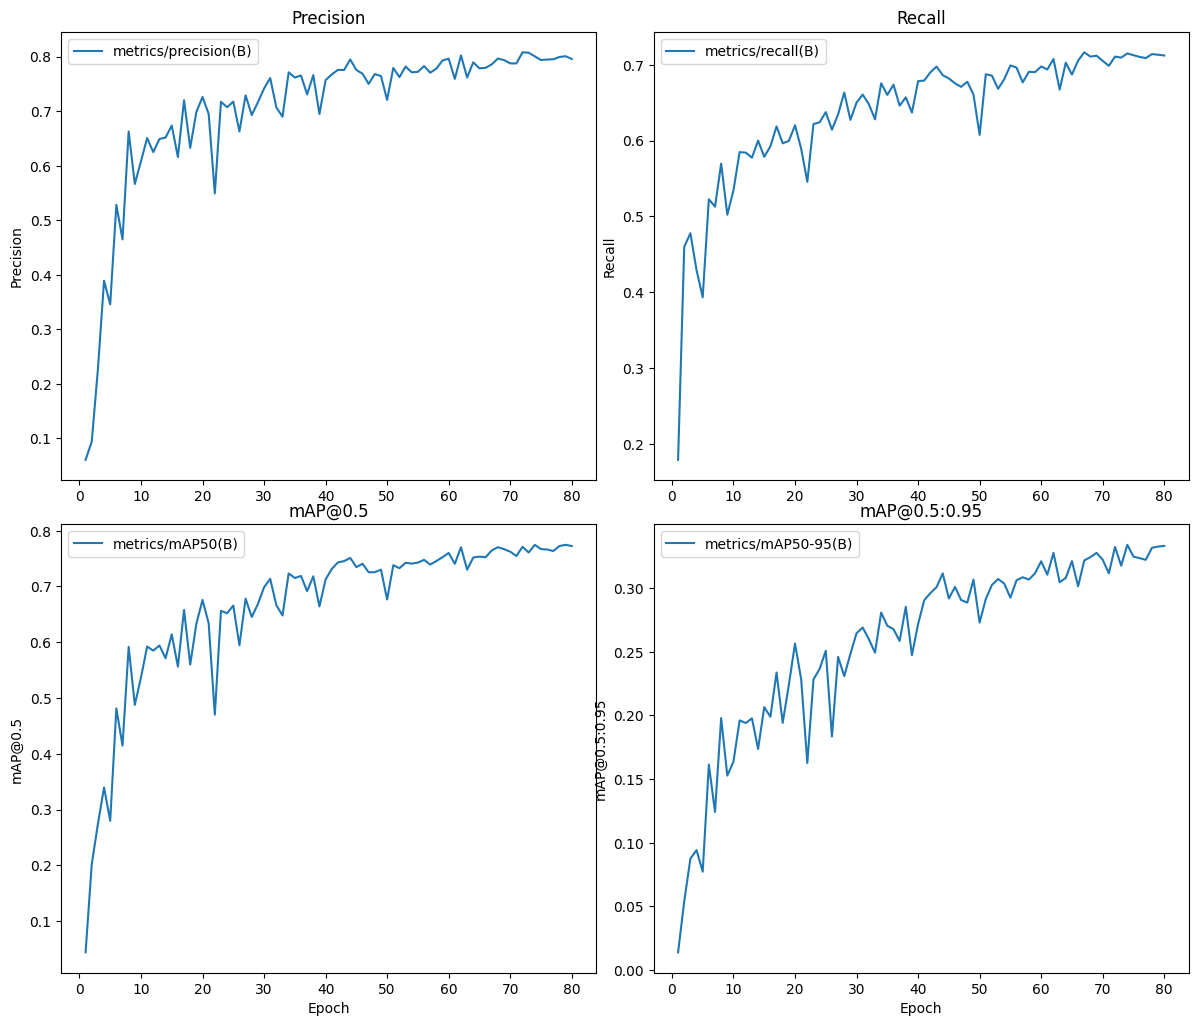

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

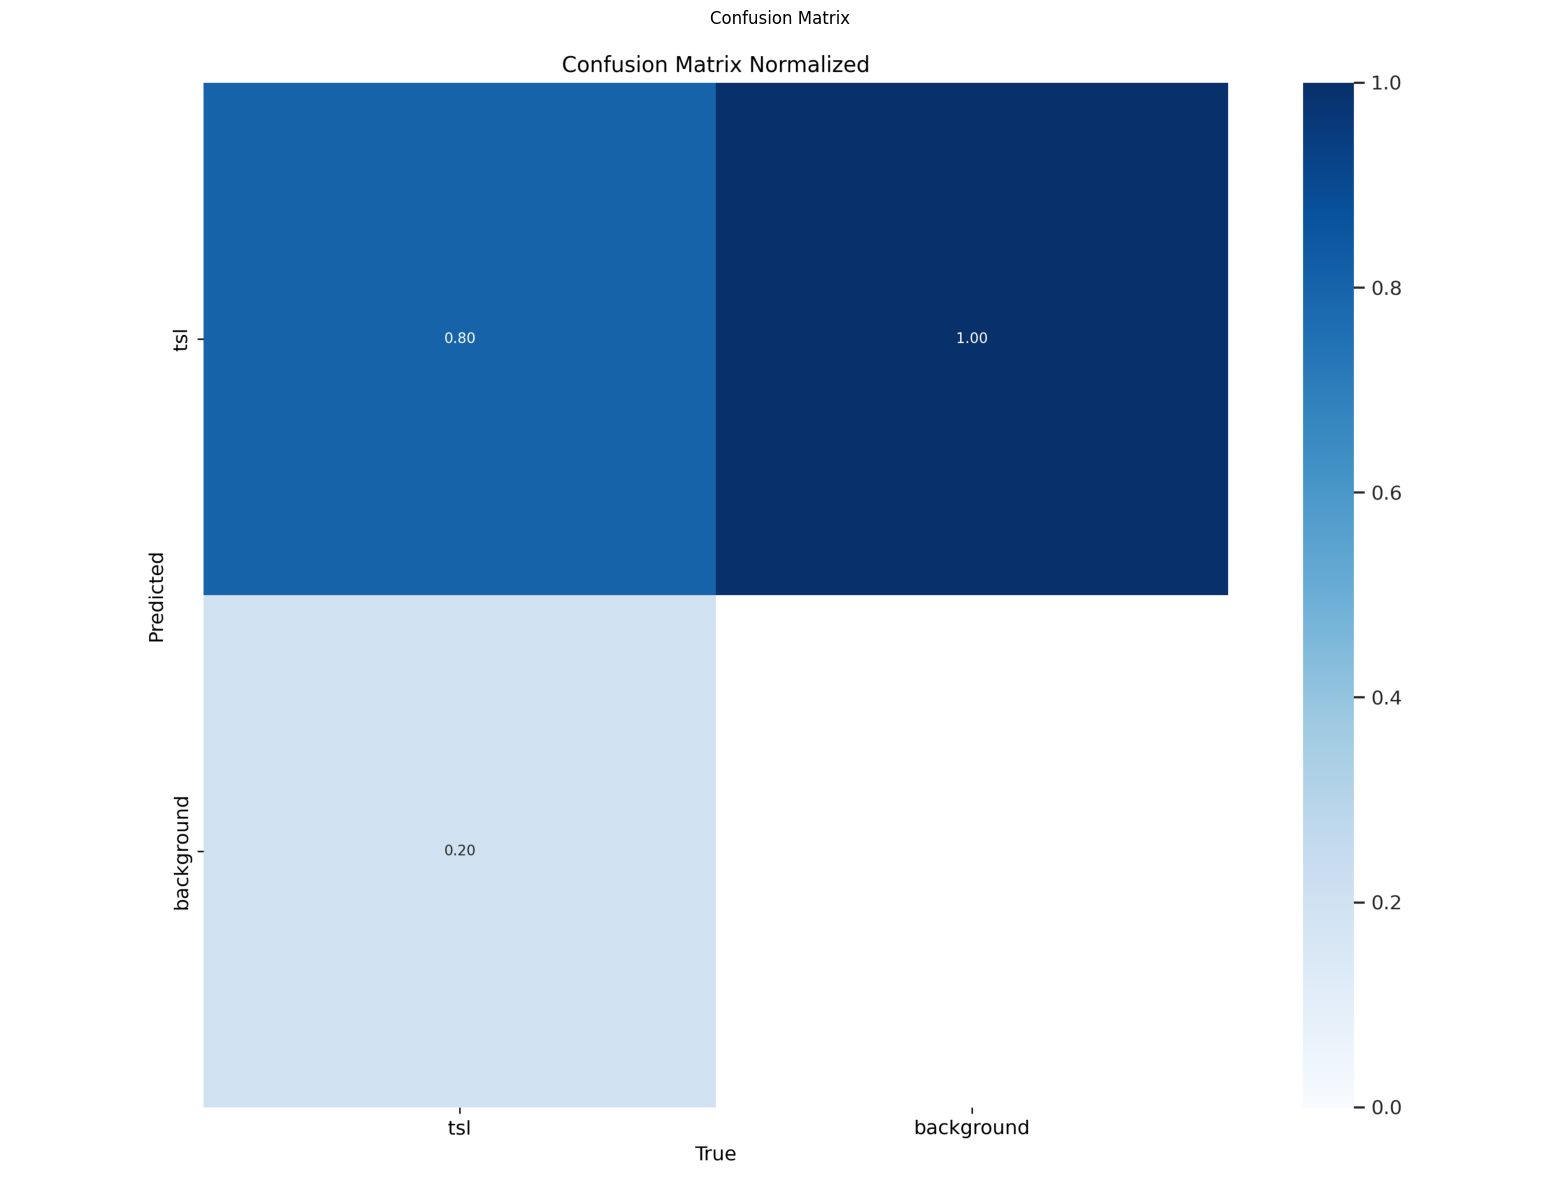

In [9]:
confusion_matrix = Image.open("YOLO11s/8_aggressive_geomtric/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 448x640 49 tsls, 76.8ms
Speed: 2.1ms preprocess, 76.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


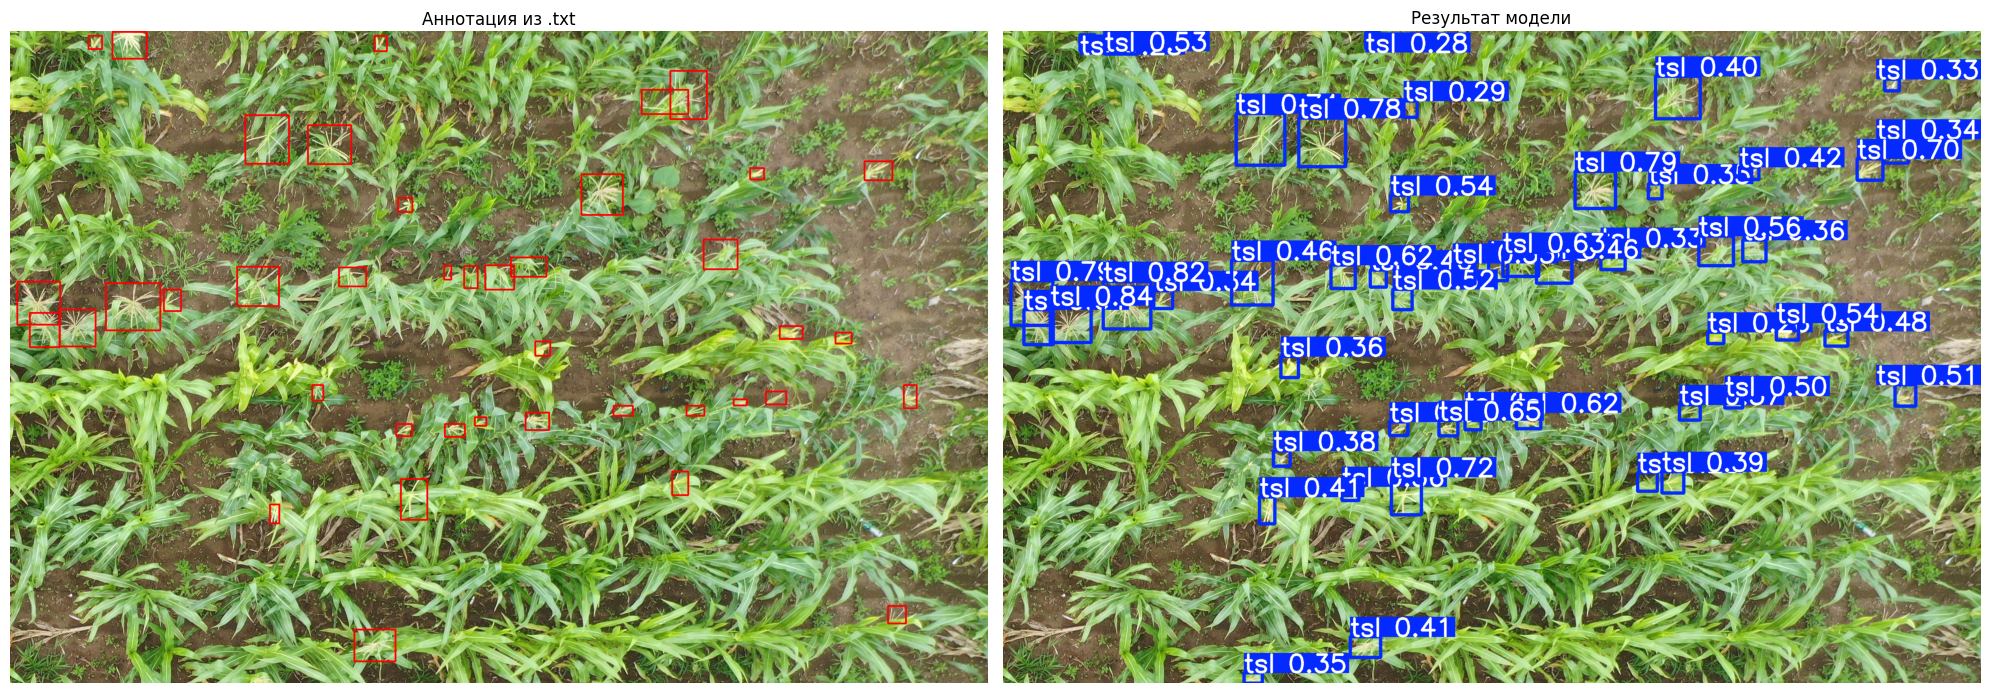

In [10]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = '/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

# Загружаем оригинальное изображение
orig_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = orig_img.shape[:2]

# Загружаем аннотации
with open(label_path, 'r') as f:
    boxes = f.readlines()

# Рисуем боксы
for box in boxes:
    cls, x_center, y_center, w, h = map(float, box.strip().split())
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Прогоняем изображение через модель
res = model(image_path)
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Отображаем оба изображения
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(orig_img)
axes[0].set_title("Аннотация из .txt")
axes[0].axis('off')

axes[1].imshow(detect_img)
axes[1].set_title("Результат модели")
axes[1].axis('off')

plt.tight_layout()
plt.show()
